In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('data/data.csv', low_memory=False)

First we fix the encoding to transform codes, such as 8 and 9 to NaN if they represent missing values. Also, we drop several columns that we found not present in the data dictionary, since we do not know what do they represent.

Then we proceed with removing columns that contain > 20% of missing values.

In [3]:
max_vals = df.select_dtypes(include='number').max()
max_9 = max_vals[max_vals == 9].index.tolist()
for col in max_9:
    df.loc[df[col] == 9, col] = np.nan 
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()

missing_subset = {'ALCFREQ', 'HATTMULT', 'STROKMUL', 'TIAMULT', 'ARTHTYPE', 'ARTHUPEX', 'ARTHLOEX', 'ARTHSPIN', 'ARTHUNK', 'CVDCOG', 'STROKCOG', 'CVDIMAG', 'CVDIMAG1', 'CVDIMAG2', 'CVDIMAG3', 'CVDIMAG4', 'PDNORMAL', 'SPEECH', 'FACEXP', 'TRESTRHD', 'TRESTLHD', 'TRESTRFT', 'TRESTLFT', 'TRACTRHD', 'TRACTLHD', 'RIGDNECK', 'RIGDUPRT', 'RIGDUPLF', 'RIGDLORT', 'RIGDLOLF', 'TAPSRT', 'TAPSLF', 'HANDMOVR', 'HANDMOVL', 'HANDALTR', 'HANDALTL', 'LEGRT', 'LEGLF', 'ARISING', 'POSTURE', 'GAIT', 'POSSTAB', 'BRADYKIN', 'RESTTRL', 'RESTTRR', 'SLOWINGL', 'SLOWINGR', 'RIGIDL', 'RIGIDR', 'BRADY', 'POSTINST', 'CORTDEF', 'SIVDFIND', 'CVDMOTL', 'CVDMOTR', 'CORTVISL', 'CORTVISR', 'SOMATL', 'SOMATR', 'EYEPSP', 'DYSPSP', 'AXIALPSP', 'GAITPSP', 'APRAXSP', 'APRAXL', 'APRAXR', 'CORTSENL', 'CORTSENR', 'ATAXL', 'ATAXR', 'ALIENLML', 'ALIENLMR', 'DYSTONL', 'DYSTONR', 'MYOCLLT', 'MYOCLRT', 'MOMOPARK', 'MOMOALS', 'AMNDEM', 'PCA', 'NAMNDEM', 'AMYLPET', 'AMYLCSF', 'FDGAD', 'HIPPATR', 'TAUPETAD', 'CSFTAU', 'FDGFTLD', 'TPETFTLD', 'MRFTLD', 'DATSCAN', 'IMAGLINF', 'IMAGLAC', 'IMAGMACH', 'IMAGMICH', 'IMAGMWMH', 'IMAGEWMH', 'CANCER', 'MYOINF', 'CONGHRT', 'AFIBRILL', 'HYPERT', 'ANGINA', 'HYPCHOL', 'VB12DEF', 'THYDIS', 'ARTH', 'ARTYPE', 'ARTUPEX', 'ARTLOEX', 'ARTSPIN', 'ARTUNKN', 'URINEINC', 'BOWLINC', 'SLEEPAP', 'REMDIS', 'HYPOSOM', 'SLEEPOTH', 'ANGIOCP', 'ANGIOPCI', 'PACEMAKE', 'HVALVE', 'ANTIENC'}
cols_to_change = list(missing_subset.intersection(max_8))
df[cols_to_change] = df[cols_to_change].replace(8, np.nan)
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()

df = df.drop(columns=['NPWBRF', 'NACCBRNN', 'NPGRCCA', 'NPGRLA', 'NPGRHA', 'NPGRSNH', 'NPGRLCH', 'NACCAVAS', 'NPTAN', 'NPABAN', 'NPASAN', 'NPTDPAN', 'NPTHAL', 'NACCBRAA', 'NACCNEUR', 'NPADNC', 'NACCDIFF', 'NACCAMY', 'NPINF', 'NACCINF', 'NPHEMO', 'NPHEMO1', 'NPHEMO2', 'NPHEMO3', 'NPOLD', 'NPOLD1', 'NPOLD2', 'NPOLD3', 'NPOLD4', 'NACCMICR', 'NPOLDD', 'NPOLDD1', 'NPOLDD2', 'NPOLDD3', 'NPOLDD4', 'NACCHEM', 'NACCARTE', 'NPWMR', 'NPPATH', 'NACCNEC', 'NPPATH2', 'NPPATH3', 'NPPATH4', 'NPPATH5', 'NPPATH6', 'NPPATH7', 'NPPATH8', 'NPPATH9', 'NPPATH10', 'NPPATH11', 'NACCLEWY', 'NPLBOD', 'NPNLOSS', 'NPHIPSCL', 'NPFTDTAU', 'NACCPICK', 'NPFTDT2', 'NACCCBD', 'NACCPROG', 'NPFTDT5', 'NPFTDT6', 'NPFTDT7', 'NPFTDT8', 'NPFTDT9', 'NPFTDT10', 'NPFTDTDP', 'NPALSMND', 'NPOFTD', 'NPOFTD1', 'NPOFTD2', 'NPOFTD3', 'NPOFTD4', 'NPOFTD5', 'NPTDPA', 'NPTDPB', 'NPTDPC', 'NPTDPD', 'NPTDPE', 'NPPDXA', 'NPPDXB', 'NACCPRIO', 'NPPDXD', 'NPPDXE', 'NPPDXF', 'NPPDXG', 'NPPDXH', 'NPPDXI', 'NPPDXJ', 'NPPDXK', 'NPPDXL', 'NPPDXM', 'NPPDXN', 'NPPDXP', 'NPPDXQ', 'NPARTAG', 'NPATGSEV', 'NPATGAMY', 'NPATGAM1', 'NPATGAM2', 'NPATGAM3', 'NPATGAM4', 'NPATGAM5', 'NPATGFRN', 'NPATGFR1', 'NPATGFR2', 'NPATGFR3', 'NPATGFR4'])

initial = df.shape[1]
threshold = 0.8 * len(df)
df = df.dropna(thresh=threshold, axis=1)
remaining = df.shape[1]
dropped = initial - remaining

print(f"initial: {initial}")
print(f"remaining: {remaining}")
print(f"dropped: {dropped}")

initial: 862
remaining: 213
dropped: 649


Now we apply the transformation mentioned during EDA - coalescing columns BILLS, SHOPPING, STOVE, TRAVEL into one column to reduce dimensionality
At the end we also create a deep copy of the dataframe, for performance reasons, to aid with fragmentation

In [4]:
impairment_vars = ['BILLS', 'SHOPPING', 'STOVE', 'TRAVEL']

functional_impairment = df[impairment_vars].sum(axis=1, skipna=True)

df = pd.concat([df, functional_impairment.rename('FUNCTIONAL_IMPAIRMENT')], axis=1)
df.drop(columns=impairment_vars, inplace=True)

df = df.copy()

Now we will create a new target variable OUTCOME_WITHIN_4_YEARS, which indicates if the patient transitioned to MCI within 4 years of his original visit. The column contains true, if the patient transitioned to MCI within 4 years, false if he did not transition to MCI no matter the time frame, and we drop the columns that transitioned beyond the 4-year target
TODO: FIX

In [5]:
conditions = [
    (df["TIME"] < 4) & (df["OUTCOME_EVENTMCI"] == False),
    (df["TIME"] < 4) & (df["OUTCOME_EVENTMCI"] == True),
    (df["TIME"] >= 4) & (df["OUTCOME_EVENTMCI"] == False),
    (df["TIME"] >= 4) & (df["OUTCOME_EVENTMCI"] == True)
]
values = [np.nan, True, False, False]

df["OUTCOME_WITHIN_4_YEARS"] = np.select(conditions, values, default=np.nan)
df = df.dropna(subset=["OUTCOME_WITHIN_4_YEARS"])

We follow by dropping the variables OUTCOME_EVENTMCI as well as TIME, since they do not matter to us anymore.
Then we will drop the target variable OUTCOME_WITHIN_4_YEARS from the X partition and assign it to Y.
Then we proceed by creating a training and testing datasets, split 80/20

In [6]:
df = df.drop(columns=['TIME', 'OUTCOME_EVENTMCI'])
X = df.drop(columns=['OUTCOME_WITHIN_4_YEARS'])
y = df['OUTCOME_WITHIN_4_YEARS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Now we can start building the preprocessing pipeline

> First we create a transformer that is going to handle outliers. We will be using the transformer in the pipeline.

In [7]:
class HandleOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, lower_quantile=0.3, upper_quantile=0.7):
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.quantile_bounds_ = {}
        numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
        
        for col in numeric_columns:
            Q1 = X[col].quantile(self.lower_quantile)
            Q2 = X[col].quantile(self.upper_quantile)
            IQR = Q2 - Q1
            self.quantile_bounds_[col] = {
                'lower_bound': Q1 - 1.5 * IQR,
                'upper_bound': Q2 + 1.5 * IQR
            }
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

        for col in numeric_columns:
            if col not in self.quantile_bounds_:
                continue  
            bounds = self.quantile_bounds_[col]
            mean_value = X[col].mean()
            
            X[col] = np.where(X[col] < bounds['lower_bound'], mean_value, 
                              np.where(X[col] > bounds['upper_bound'], mean_value, X[col]))
        return X.values

> Now we can split the dataset to numerical and categorical columns and create two sub-pipelines and process them separately, in the end we will join them again

> The numerical pipeline include a simple imputer using median, clipping outliers in the 0.3 and 0.7 quantiles and scaling the remaining values using standardscaler

> The categorical pipeline is being imputed using most_frequent method, and the values are then encoded using one hot encoder.

> At first, we are creating a variance threshold, to remove non-informative features. We are going to be using thresholds of 0.01, 0.05 and 0.1 and inspect the number of remaining features after each application.

In [9]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh_low = VarianceThreshold(threshold=0.01)
var_thresh_mid = VarianceThreshold(threshold=0.05)
var_thresh_high = VarianceThreshold(threshold=0.1)

preprocessor.fit(X_train)
vt_low_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', var_thresh_low)
])
vt_mid_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', var_thresh_mid)
])
vt_high_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', var_thresh_high)
])

X_vt_low = vt_low_pipeline.fit_transform(X_train)
X_vt_mid = vt_mid_pipeline.fit_transform(X_train)
X_vt_high = vt_high_pipeline.fit_transform(X_train)

print("Original X_train shape:", X_train.shape)
print("X_train shape after variance threshold of 0.01:", X_vt_low.shape)
print("X_train shape after variance threshold of 0.05:", X_vt_mid.shape)
print("X_train shape after variance threshold of 0.1:", X_vt_high.shape)

Original X_train shape: (15108, 208)
X_train shape after variance threshold of 0.01: (15108, 206)
X_train shape after variance threshold of 0.05: (15108, 206)
X_train shape after variance threshold of 0.1: (15108, 206)


> We can observe from the results, that the original number of columns was 208. After the application of the lowest variance threshold, the number of remaining features dropped to 207, after applying the medium threshold (0.05), the remaining number of features was also 207 and after applying threshold of 0.1 the number of remaining features was still 207.
> We are going to be applying the variance threshold of 0.1 in the final pipeline to reduce the time and computational resources when applying further layers of feature selection.

> In the following pipeline we are going to be exploring the options of further layers of feature selection. We are going to be focusing on two primary methods - select k best, and recursive feature elimination, each with different options. 

> In the select k best, we are going to try different scoring functions - f_classif, based on ANOVA and mutual_info_classif based on mutual information. It is expected that mutual_info_classif is going perform better, since we are working with both categorical and numerical data, as well as we have the assumption of the data not having many linear relationships.

> In the RFE, we are going to be using logistic regression and random forest as classification algorithms. Since random forest is a more robust model, it is expected to yield better results. 

> We are also going to try to select different amount of features, to see which combination performs the best. We will try to select 50 features with the univariate selection, and 20 with the RFE, and 20 with univatriate selection and 10 with RFE.

In [10]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
score_funcs = [f_classif, mutual_info_classif]  
n_features_rfe = [10, 20, 50, 75]  
k_values = {10: 20, 20: 50, 50: 100, 75: 100}
rfe_estimators = [LogisticRegression(max_iter=1000, solver='liblinear'), RandomForestClassifier()]  

results = []

for n_features in n_features_rfe:
    k = k_values[n_features]  

    for score_func in score_funcs:
        for estimator in rfe_estimators:
            select_k = SelectKBest(score_func=score_func, k=k)
            rfe = RFE(estimator=estimator, n_features_to_select=n_features)
            full_pipeline = Pipeline([
                ('preprocessor', preprocessor),
                ('variance_threshold', var_thresh),
                ('select_k_best', select_k),
                ('rfe', rfe),
                ('classifier', LogisticRegression(max_iter=1000, solver='liblinear'))
            ])

            full_pipeline.fit(X_train, y_train)

            test_predictions_proba = full_pipeline.predict_proba(X_test)[:, 1] 
            log_likelihood = -log_loss(y_test, test_predictions_proba, normalize=False)

            model = full_pipeline.named_steps['classifier']
            k_params = model.coef_.size + 1  

            aic = 2 * k_params - 2 * log_likelihood

            results.append({
                'k': k,
                'score_func': score_func.__name__,
                'n_features_rfe': n_features,
                'rfe_estimator': estimator.__class__.__name__,
                'num_params': k_params,
                'AIC': aic
            })

results_df = pd.DataFrame(results)
print(results_df)

      k           score_func  n_features_rfe           rfe_estimator  \
0    20            f_classif              10      LogisticRegression   
1    20            f_classif              10  RandomForestClassifier   
2    20  mutual_info_classif              10      LogisticRegression   
3    20  mutual_info_classif              10  RandomForestClassifier   
4    50            f_classif              20      LogisticRegression   
5    50            f_classif              20  RandomForestClassifier   
6    50  mutual_info_classif              20      LogisticRegression   
7    50  mutual_info_classif              20  RandomForestClassifier   
8   100            f_classif              50      LogisticRegression   
9   100            f_classif              50  RandomForestClassifier   
10  100  mutual_info_classif              50      LogisticRegression   
11  100  mutual_info_classif              50  RandomForestClassifier   
12  100            f_classif              75      LogisticRegres

In [11]:
results_df_sorted = results_df.sort_values(by='AIC')
print(results_df_sorted)

      k           score_func  n_features_rfe           rfe_estimator  \
10  100  mutual_info_classif              50      LogisticRegression   
8   100            f_classif              50      LogisticRegression   
9   100            f_classif              50  RandomForestClassifier   
11  100  mutual_info_classif              50  RandomForestClassifier   
6    50  mutual_info_classif              20      LogisticRegression   
13  100            f_classif              75  RandomForestClassifier   
12  100            f_classif              75      LogisticRegression   
15  100  mutual_info_classif              75  RandomForestClassifier   
14  100  mutual_info_classif              75      LogisticRegression   
5    50            f_classif              20  RandomForestClassifier   
4    50            f_classif              20      LogisticRegression   
3    20  mutual_info_classif              10  RandomForestClassifier   
7    50  mutual_info_classif              20  RandomForestClassi

> The results show that the AIC scores are grouped based on the number of features. The best performing were 20 feature groups and the worst performing were the 10 feature groups. Among the 20 feature group, the best overall seems to be using f_classif and random forest classifier with a score of 752, but the other combinations in this feature range are within 4 points of the AIC score.

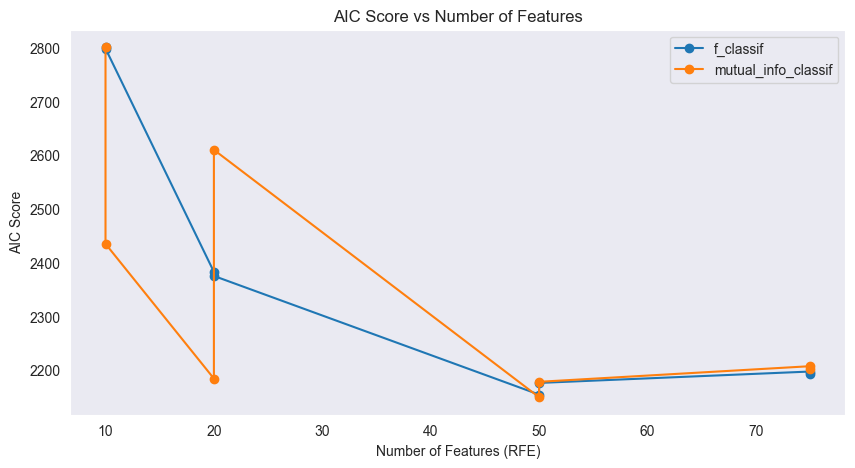

In [12]:
plt.figure(figsize=(10,5))
for score_func in results_df['score_func'].unique():
    subset = results_df[results_df['score_func'] == score_func]
    plt.plot(subset['n_features_rfe'], subset['AIC'], marker='o', label=score_func)

plt.xlabel('Number of Features (RFE)')
plt.ylabel('AIC Score')
plt.title('AIC Score vs Number of Features')
plt.legend()
plt.grid()
plt.show()


> From the graph, we can confirm the results - using 20 features is the optimal range. The drop in the score from 10 features to 20 features indicates that 10 features is not enough for a good fit, as well as increasing the number of features beyond 20 reduces the performance, introduces noise and may cause overfitting.

> Now we can proceed to build a final preprocessing pipeline with the optimal settings - using select k best with f_classif to select 50 features, and rfe with random forest classifier to select the best 20 features from the subset.

In [8]:
from sklearn.metrics import roc_auc_score

num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=mutual_info_classif, k=100)
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(estimator=LogisticRegression(max_iter=1000, solver='liblinear'), n_features_to_select=50)

full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', LogisticRegression(max_iter=200))
])

full_pipeline.fit(X_train, y_train)

test_proba = full_pipeline.predict_proba(X_test)[:, 1]

test_roc_auc = roc_auc_score(y_test, test_proba)

train_proba = full_pipeline.predict_proba(X_train)[:, 1]
train_roc_auc = roc_auc_score(y_train, train_proba)
print(f"Training roc_auc: {train_roc_auc}\nTesting roc_auc: {test_roc_auc}")

Training roc_auc: 0.9485931651901454
Testing roc_auc: 0.9460350893849717


In [9]:
train_predictions = full_pipeline.predict(X_train)
print("Training Classification Report:\n", classification_report(y_train, train_predictions))

Training Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91     10493
         1.0       0.79      0.82      0.80      4615

    accuracy                           0.88     15108
   macro avg       0.85      0.86      0.86     15108
weighted avg       0.88      0.88      0.88     15108


In [10]:
test_predictions = full_pipeline.predict(X_test)
print("Test Classification Report:\n", classification_report(y_test, test_predictions))

Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      2591
         1.0       0.79      0.83      0.81      1187

    accuracy                           0.88      3778
   macro avg       0.86      0.87      0.86      3778
weighted avg       0.88      0.88      0.88      3778


> Based on the classification reports, the basic model performs reasonably well on both training and test data. The results show no signs of overfitting or underfitting.

In [11]:
cv_scores = cross_val_score(full_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Mean Accuracy:", cv_scores.mean())

Cross-Validation Mean Accuracy: 0.8745699582297402


> The cross validation score supports the good performance of the initial model.